<a href="https://colab.research.google.com/github/Sergey-Kiselev-dev/ML_sem_pub/blob/main/ML_03_selfedu_tf_05c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

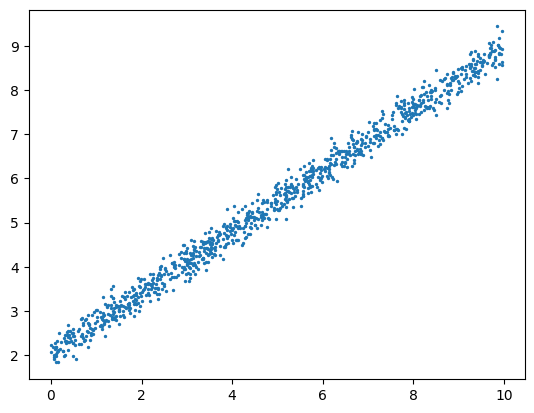

In [2]:
TOTAL_POINTS = 1000

x = tf.random.uniform(shape=[TOTAL_POINTS], minval=0, maxval=10)
noise = tf.random.normal(shape=[TOTAL_POINTS], stddev=0.2)

k_true = 0.7
b_true = 2.0

y = x * k_true + b_true + noise

plt.scatter(x, y, s=2)
plt.show()

In [3]:
k = tf.Variable(0.0)
b = tf.Variable(0.0)

f = k * x + b
loss = tf.reduce_mean(tf.square(y - f))

EPOCHS = 50
learning_rate = 0.02

BATCH_SIZE = 100
num_steps = TOTAL_POINTS // BATCH_SIZE

In [46]:
# Stachostic Gradient Descent
# learning_rate = 0.02; opt = tf.optimizers.SGD(learning_rate = learning_rate)
# Method of moments
# learning_rate = 0.02; opt = tf.optimizers.SGD(momentum = 0.5, learning_rate = learning_rate)
# Method Nesterov
# learning_rate = 0.02; opt = tf.optimizers.SGD(momentum = 0.5, nesterov = True, learning_rate = learning_rate)
# Adagrad
# learning_rate = 0.2; opt = tf.optimizers.Adagrad(learning_rate = learning_rate)
# Adadelta
# learning_rate = 4.0; opt = tf.optimizers.Adadelta(learning_rate = learning_rate)
# RMSProp
# learning_rate = 0.01; opt = tf.optimizers.RMSprop(learning_rate = learning_rate)
# Adam
learning_rate = 0.1; opt = tf.optimizers.Adam(learning_rate = learning_rate)

for n in range(EPOCHS):
  for i_batch in range(num_steps):
    y_batch = y[i_batch * BATCH_SIZE : (i_batch+1) * BATCH_SIZE]
    x_batch = x[i_batch * BATCH_SIZE : (i_batch+1) * BATCH_SIZE]

    with tf.GradientTape() as t:
      f = k * x_batch + b
      loss = tf.reduce_mean(tf.square(y_batch - f))

    dk, db = t.gradient(loss, [k, b])

    opt.apply_gradients(zip([dk, db], [k, b]))
    # k.assign_sub(learning_rate * dk)
    # b.assign_sub(learning_rate * db)

In [47]:
print(k, b, sep="\n")

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.70014894>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.0470777>


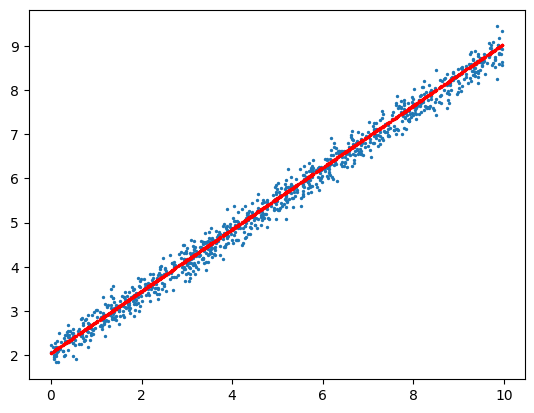

In [48]:

y_pr = k * x + b
plt.scatter(x, y, s = 2)
plt.scatter(x, y_pr, c = 'r', s = 2)